We will use a polynomial regression model with tunable parameter:degree

First degree polynomial: y = ax + b

Third degree polynomial:$$ y =  {ax^3} + {bx^2} + cx + d $$

In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# return a pipeline with a polynomial preprocessor and simple linear regression
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))

In [2]:
# create some data
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N,1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err>0:
        y += err * rng.randn(N)
    return X,y

X,y = make_data(40)

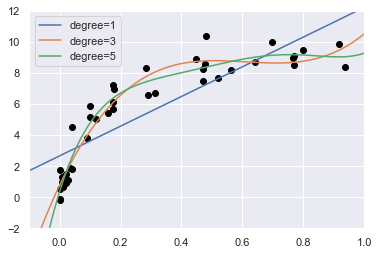

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn; seaborn.set() #plot formatting

X_test = np.linspace(-0.1,1.1,500)[:, None]

plt.scatter(X.ravel(), y, color="black")
axis = plt.axis()

# plot polynomials of degree 1,3,5
for degree in [1,3,5]:
    y_test = PolynomialRegression(degree).fit(X,y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))

plt.xlim(-0.1, 1.0)
plt.ylim(-2,12)
plt.legend(loc='best');

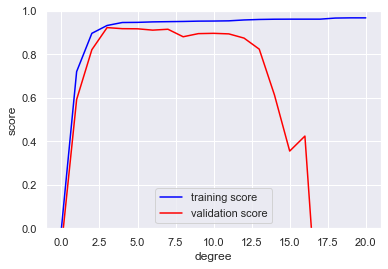

In [4]:
from sklearn.model_selection import validation_curve
degree = np.arange(0,21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y, param_name='polynomialfeatures__degree', param_range=degree, cv=7)

plt.plot(degree, np.median(train_score,1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0,1)
plt.xlabel('degree')
plt.ylabel('score');

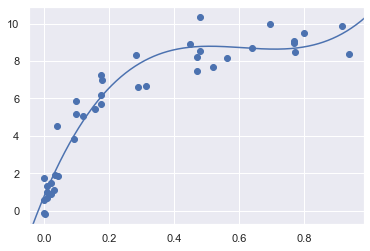

In [5]:
plt.scatter(X.ravel(),y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X,y).predict(X_test)
plt.plot(X_test.ravel(),y_test);
plt.axis(lim);

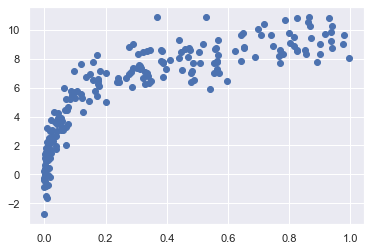

In [6]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(),y2);

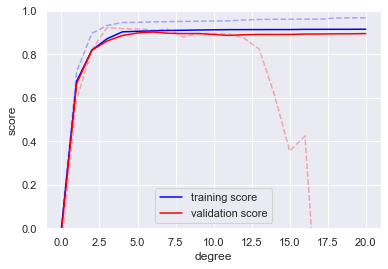

In [7]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2, param_name='polynomialfeatures__degree', param_range=degree, cv=7)

plt.plot(degree, np.median(train_score2,1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0,1)
plt.xlabel('degree')
plt.ylabel('score');

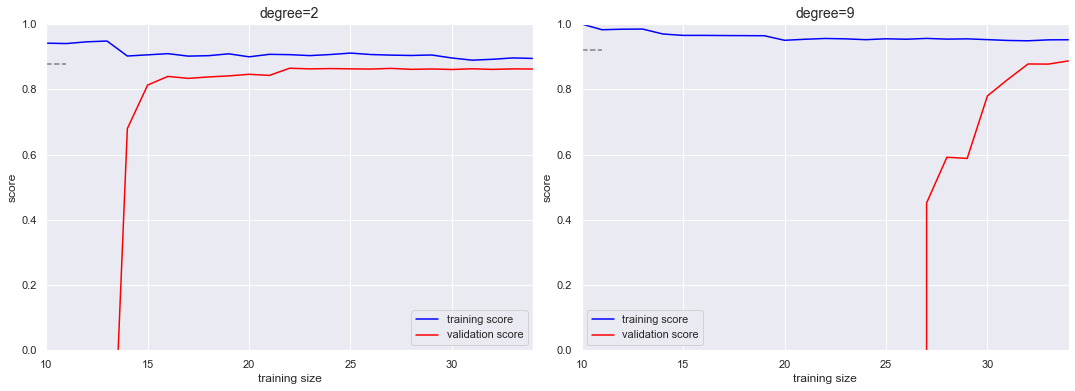

In [8]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2,9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree), X, y, cv=7, train_sizes=np.linspace(0.3,1,25))
    
    ax[i].plot(N,np.mean(train_lc,1), color='blue', label='training score')
    ax[i].plot(N,np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1],val_lc[-1],]), N[0], N[1], color='gray',linestyle='dashed')
    
    ax[i].set_ylim(0,1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree={0}'.format(degree),size=14)
    ax[i].legend(loc='best')